In [180]:

import numpy as np
from numpy.linalg import inv
import scipy.linalg
import matplotlib.pyplot as plt
import math as m
%matplotlib inline

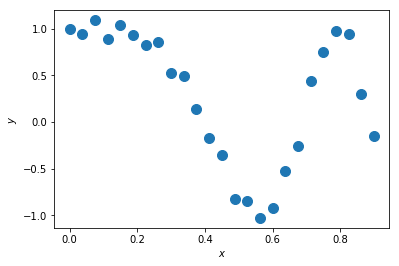

In [2]:
N = 25
X = np.reshape(np.linspace(0, 0.9, N), (N, 1))
y = np.cos(10*X**2) + 0.1 * np.sin(100*X)
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [3]:
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    theta_ml = np.zeros((D,1)) ## <-- EDIT THIS LINE
    theta_ml= (inv(X.T @ X))@ X.T @ y
    return theta_ml

In [4]:
def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    
    prediction = Xtest @ theta ## <-- EDIT THIS LINE
    
    return prediction 

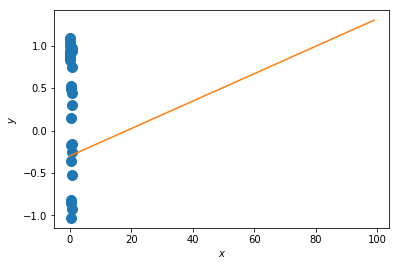

In [5]:
N=100
Xtest=np.reshape(np.linspace(-0.3, 1.3, N), (N, 1))



plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.plot(Xtest)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [6]:
## EDIT THIS FUNCTION
def poly_features(X, K):
    
    #X: inputs of size N x 1
    #K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    for i in range (N):
        for j in range (K+1):
            Phi[i][j]=X[i]**j
    #Phi = np.zeros((N, K+1)) ## <-- EDIT THIS LINE
    #print('Phi', Phi)
    return Phi

In [7]:
## EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    kappa = 1e-080# good for numerical stability
    N,D=Phi.shape
    K = Phi.shape[1]  
    I=np.eye(D)
    #print("I",I)
    # maximum likelihood estimate
    ####################theta_ml = np.zeros((K,1)) ## <-- EDIT THIS LINE
    theta_ml = np.zeros((K+1,1)) ## <-- EDIT THIS LINE
    theta_ml=inv((Phi.T @ Phi) +kappa*I) @ Phi.T @ y
    return theta_ml

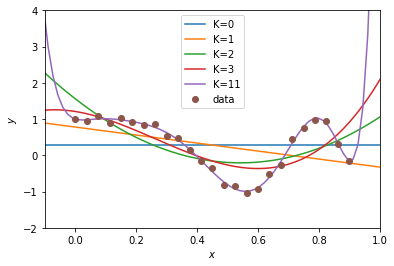

In [295]:
Kmax=[0,1,2,3,11]
plot=[]
for K in Kmax:
    Phi = poly_features(X, K) # N x (K+1) feature matrix
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator
    Phi_test = poly_features(Xtest, K)
    plot.append(Phi_test @ theta_ml) # predicted y-values
    #plot[K]=y_pred
    #plt.plot(Xtest, y_pred, label='%i,K')
# plt.plot(X, y, 'o')  
# Phi = poly_features(X, 11) # N x (K+1) feature matrix
# theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator
# Phi_test = poly_features(Xtest, 11)
# y_pred11 = Phi_test @ theta_ml # predicted y-values
# array.append(y_pred11)
plt.plot(Xtest, plot[0],label='K=0')
plt.plot(Xtest, plot[1],label='K=1')
plt.plot(Xtest, plot[2],label='K=2')
plt.plot(Xtest, plot[3],label='K=3')
plt.plot(Xtest, plot[4],label='K=11')
plt.plot(X, y, 'o',label='data')
plt.ylim(-2,4)
plt.xlim(-0.1,1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.savefig('1a',dpi=1000)
# plt.show()
# #plt.ylim(-1.5,3)

In [9]:

#######################B###########################
#######################B###########################
#######################B###########################

Xtest=np.reshape(np.linspace(-1, 1.2, N), (N, 1))
def poly_features1(X, K):
    
    #X: inputs of size N x 1
    #K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, 2*K+1))
    #Phi[0][0]=1
    # Compute the feature matrix in stages
    for i in range (N):
        for j in range (2*K+1):
            if j==0:
                Phi[i][j]=1
            if j%2!=0:#########odd number
                Phi[i][j]=np.sin(2*m.pi*((j+1)/2)*X[i])
            if j%2==0 and j!=0:########even number
                Phi[i][j]=np.cos(2*m.pi*(j/2)*X[i])
    #Phi = np.zeros((N, K+1)) ## <-- EDIT THIS LINE
    #print 
    return Phi
    

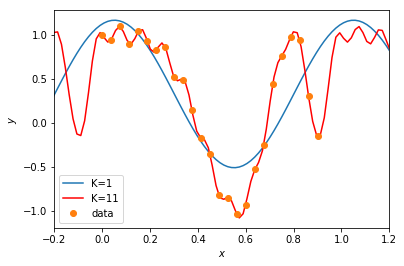

In [293]:
Kmax=3
array=[]
for K in range (Kmax+1):
    Phi = poly_features1(X, K) # N x (K+1) feature matrix
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator
    Phi_test = poly_features1(Xtest, K)
    y_pred = Phi_test @ theta_ml # predicted y-values
    array.append(y_pred)
    
Phi11 = poly_features1(X, 11) # N x (K+1) feature matrix
theta_ml = nonlinear_features_maximum_likelihood(Phi11, y) # maximum likelihood estimator
Phi_test11 = poly_features1(Xtest, 11)
y_pred11 = Phi_test11 @ theta_ml # predicted y-values
array.append(y_pred11)

#plt.plot(Xtest, array[0],label='K=0')
plt.plot(Xtest, array[1],label='K=1')
#plt.plot(Xtest, array[2],label='K=2')
#plt.plot(Xtest, array[3],label='K=3')
plt.plot(Xtest, array[4], 'r',label='K=11')
plt.plot(X, y, 'o',label='data')
plt.xlim(-0.2,1.2)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.savefig('1b',dpi=1000)
#plt.show()

In [11]:
## EDIT THIS FUNCTION
def MSE(y, ypred):
    summ=0
    for i in range (len(y)):
        summ+=(y[i]-ypred[i])**2
    mse = summ/len(y) ## <-- EDIT THIS LINE
    return mse

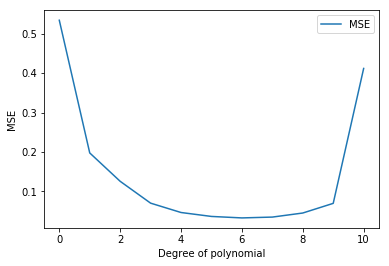

In [13]:
Kmax=10
mse_train=[]
err = np.zeros(11)
#print(len(x_new))
#ytest=np.cos(10*Xtest**2) + 0.1 * np.sin(100*Xtest)
for K in range (Kmax+1):
    e=0
    for l in range (len(y)):
        y_new= np.delete(y,l)
        x_new= np.delete(X,l)
        x_test=X[l]
        #print('x_new',x_new)
        #print('y_new',y_new)
        Phi = poly_features1(x_new, K) # N x (K+1) feature matrix
        theta_ml = nonlinear_features_maximum_likelihood(Phi, y_new) # maximum likelihood estimator
        y_pred = poly_features1(x_test, K) @ theta_ml # predicted y-values
        e+=(y_pred-y[l])**2/25
        #error=(((sum(y_pred - y_new))**2)/24)
        #error=MSE(y_pred,y_new)
    err[K]=e
        
plt.figure()
plt.plot(range(11), err,label='MSE')
#plt.plot(alpha,label='maximum likelihood value')
#plt.xlim(0,10)
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")
plt.legend()
plt.show()

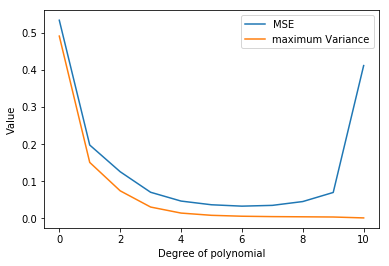

In [294]:
Kmax=10
mse_train=[]
err = np.zeros(11)
var= np.zeros(11)
#print(len(x_new))
#ytest=np.cos(10*Xtest**2) + 0.1 * np.sin(100*Xtest)
for K in range (Kmax+1):
    v=0
    e=0
    for l in range (len(y)):
        y_new= np.delete(y,l)
        x_new= np.delete(X,l)
        x_test=X[l]
        #print('x_new',x_new)
        #print('y_new',y_new)
        Phi = poly_features1(x_new, K) # N x (K+1) feature matrix
        theta_ml = nonlinear_features_maximum_likelihood(Phi, y_new) # maximum likelihood estimator
        y_pred = poly_features1(x_test, K) @ theta_ml # predicted y-values
        yp=Phi @ theta_ml
        e+=(y_pred-y[l])**2/25
        #v+=(((sum(y_pred - y_new))**2)/24)
        v+=MSE(yp,y_new)/25
    #var=nonlinear_features_maximum_likelihood(poly_features1(x_new, K),y_new)
    err[K]=e    
    var[K]= v
plt.figure()
plt.plot(range(11), err,label='MSE')
plt.plot(range(11),var,label='maximum Variance')
#plt.xlim(0,10)
plt.xlabel("Degree of polynomial")
plt.ylabel("Value")
plt.legend()
plt.savefig('1c',dpi=1000)
#plt.title('MSE Vs MAL')
#plt.show()

In [15]:
#######################2######################

In [16]:
sampl = np.arange(0,1,0.05)
print(len(sampl))

20


In [76]:
def phi_map (y, phi, lamda):
    D,N = phi.shape
    I=np.eye(N)
    return inv(phi.T @ phi+ lamda *I) @ (phi.T @ y)

(25, 41)
(41, 1)
(100, 41)


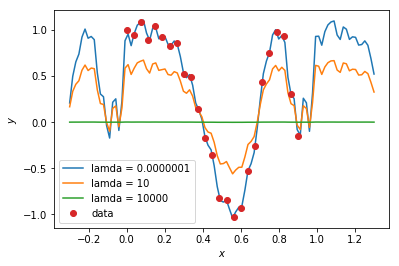

In [292]:
N=100
Xtest=np.reshape(np.linspace(-0.3, 1.3, N), (N, 1))
test=np.array([20])
lamda1=0.0000001
lamda2=10
lamda3=10000
kmax=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
#kmax=np.array([0,1,2,3,4,5])
PLO=np.zeros((20))
for K in (20,):
    p=poly_features1(X,K)
    theta_map1=phi_map(y,p,lamda1)
    theta_map2=phi_map(y,p,lamda2)
    theta_map3=phi_map(y,p,lamda3)
    p_test=poly_features1(Xtest,K)
    y_predect1=p_test @ theta_map1
    y_predect2=p_test @ theta_map2
    y_predect3=p_test @ theta_map3
    if 50:
        plt.plot(Xtest,y_predect1,label='lamda = 0.0000001')
        plt.plot(Xtest,y_predect2,label='lamda = 10')
        plt.plot(Xtest,y_predect3,label='lamda = 10000 ')

print(p.shape)
print(theta_map.shape)
print(p_test.shape)
plt.plot(X,y,'o',label='data')
#plt.plot(PLO)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.savefig('2a',dpi=1000)
plt.show()

In [ ]:
increase lamda => overfitting

In [130]:
def loss (y,x):
    for i in range (len(x)):
        summ=0
        ph=poly_features1(x[i],20)
        th=phi_map(y[i],ph,0.0001)
        summ+=((y[i] -(ph @ th))**2) + (0.0001 * (ph).T @ ph)
    return summ

In [336]:
phi=poly_features(X,1)
def lml (alpha, beta, phi, y):
    N,K= phi.shape
    I1=np.eye(K)
    I2=np.eye(N)
    m= (phi @ (alpha*I1) @ phi.T) + (beta*I2)
    det=np.linalg.det(m)
    g=y.T @ inv(m) @ y
    ans= (-N/2)* np.log(2* np.pi)- (1/2)*(np.log(det)) - (1/2)*(g[0][0])
    return ans

In [367]:
def det_lml (alpha, beta, phi, y):
    N,K= phi.shape
    I1=np.eye(K)
    I2=np.eye(N)
    m= (phi @ (alpha*I1) @ phi.T) + (beta*I2)
    #comm= y.T @ inv(m) @ phi @ phi.T @ inv(m) @ y
    m_inv=np.linalg.inv(m)
    d_alpha= -1/2 * np.trace(m_inv @ phi @ phi.T) + 1/2 * y.T @ m_inv @ phi @ phi.T @ m_inv @ y
    d_beta= -1/2 * np.trace(m_inv) + 1/2 * y.T @ m_inv @ m_inv @ y
    return np.array([d_alpha,d_beta])

In [368]:
det_lml (1,1, phi, y)


array([[[-0.44019842]],

       [[-6.46399089]]])

In [388]:
d_alpha,d_beta=det_lml (1, 1, phi, y)
alpha_array=[]
beta_array=[]
lr=0.0001
beta=1
w_prev=np.array([[0,0]])
w_current=np.array([[1,1]])
for alpha in np.arange (0,1,0.1):
    for beta in np.arange (0,1,0.1):
        while (w_current-w_prev != 0.001):
            alpha=alpha-lr*d_alpha
            beta=beta-lr*d_beta
            w_current=det_lml(alpha,beta,phi, y)
        if ((w_current-w_prev).all == 0.001):
            alpha_array.append(w_current[0])
            print (alpha)
            beta_array.append(w_current[1])
            print (beta)
        #break
        w_prev=w_current   
    #alpha_array.append(w[0])
    #beta_array.append(w[1])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [351]:
def loss_mml (alpha, beta, phi, y,lr):
    d_alpha,d_beta=det_lml (alpha, beta, phi, y)
    alpha=alpha-lr*d_alpha
    beta=beta-lr*d_beta

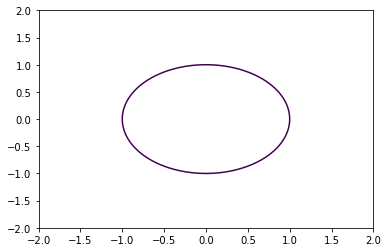

In [342]:
def Circle(x,y):
    return (x*x+y*y)

xx=np.linspace(-2,2,400)
yy=np.linspace(-2,2,400)
[X,Y]=np.meshgrid(xx,yy)

Z=Circle(X,Y)

plt.figure()
plt.contour(X,Y,Z,[1])
plt.show()

In [395]:
lr = 0.00001
alpha_0 = 1
beta_0 = 1
theta = np.array([alpha_0, beta_0])
epsilon = 1e-9
err = 10 * epsilon
i = 0
thetas = []
thetas.append([alpha_0,beta_0])
max_iters = 500000
while (err > epsilon) and i < max_iters:
    step = lr * det_lml(theta[0], theta[1] , Phi,y).squeeze()
    theta = theta + step 
    thetas.append(theta.copy())
    err = max(abs(step))
    i += 1

[2.95160511 0.27340018]


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


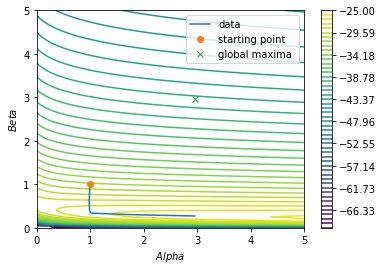

In [401]:
xplot = np.linspace(0.001,5,100)
yplot = np.linspace(0.001,5,100)
xplot,yplot = np.meshgrid(xplot,yplot)
z = np.zeros(xplot.shape)
for i in range(xplot.shape[0]):
    for j in range(xplot.shape[1]):
        k = lml(xplot[i,j],yplot[i,j],Phi,y).copy().squeeze()
        #print(k)
        z[i,j] = k
z = np.clip(z, -70, 0)
plt.contour(xplot,yplot,z, levels=np.linspace(-70,-25,50))
plt.colorbar()
thetas = np.array(thetas)
plt.plot(*(thetas.T))
print(thetas[-1])
plt.xlabel("$Alpha$")
plt.ylabel("$Beta$")
plt.plot(thetas[0,0],thetas[0,1],'o')
plt.plot(thetas[-1,0],thetas[-1,0],'x')
plt.legend(["data" ,"starting point" , "global maxima "])
plt.legend()
plt.savefig('3a',dpi=1000)